In [2]:
# Modules
import os
import csv
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [3]:
# Save path to data set in a variable
temperatura = "../Resources/GlobalLandTemperaturesByCountry.csv"

In [4]:
# Use Pandas to read data
temperatura_pd = pd.read_csv(temperatura)
temperatura_pd.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [5]:
# Delete extraneous column
del temperatura_pd['AverageTemperatureUncertainty']
temperatura_pd.head()

,dt,AverageTemperature,Country
0,1743-11-01,4.384,Åland
1,1743-12-01,NaN,Åland
2,1744-01-01,NaN,Åland
3,1744-02-01,NaN,Åland
4,1744-03-01,NaN,Åland


In [6]:
# Identify incomplete rows
temperatura_pd.count()

dt                    577462
AverageTemperature    544811
Country               577462
dtype: int64

In [7]:
# Drop all rows with missing information
temperatura_pd = temperatura_pd.dropna(how='any')

In [8]:
# Verify dropped rows
temperatura_pd.count()

dt                    544811
AverageTemperature    544811
Country               544811
dtype: int64

In [9]:
# Define dates as datetime objects
#date_dt3 = datetime.strptime(temperatura_pd["dt"], '%Y-%M-%D')
#date_dt3

temperatura_pd['dt'] =  pd.to_datetime(temperatura_pd['dt'],
                              format='%Y-%m-%d')

# Confirm the date column is in datetime format
print(temperatura_pd.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544811 entries, 0 to 577460
Data columns (total 3 columns):
dt                    544811 non-null datetime64[ns]
AverageTemperature    544811 non-null float64
Country               544811 non-null object
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 16.6+ MB
None


In [10]:
#We'll use data from 1960 and over
temperatura_pd = temperatura_pd.loc[temperatura_pd.dt > "1960-01-01"]
temperatura_pd.head()

,dt,AverageTemperature,Country
2595,1960-02-01,-5.233,Åland
2596,1960-03-01,-2.362,Åland
2597,1960-04-01,1.922,Åland
2598,1960-05-01,8.495,Åland
2599,1960-06-01,13.968,Åland


In [11]:
# Display an overview of the Employers column
temperatura_pd['Country'].value_counts()

Turks And Caicas Islands                     644
Puerto Rico                                  644
British Virgin Islands                       644
El Salvador                                  644
Nicaragua                                    644
Mexico                                       644
Honduras                                     644
Cayman Islands                               644
Haiti                                        644
Saint Pierre And Miquelon                    644
Virgin Islands                               644
Bahamas                                      644
Dominican Republic                           644
Canada                                       644
North America                                644
Guatemala                                    644
Costa Rica                                   644
United States                                644
Cuba                                         644
Jamaica                                      644
Belize              

In [12]:
temperatura_pd [temperatura_pd['Country'] == "Tanzania"]

,dt,AverageTemperature,Country
519897,1960-02-01,22.665,Tanzania
519898,1960-03-01,22.382,Tanzania
519899,1960-04-01,21.945,Tanzania
519900,1960-05-01,21.715,Tanzania
519901,1960-06-01,21.081,Tanzania
519902,1960-07-01,20.054,Tanzania
519903,1960-08-01,21.144,Tanzania
519904,1960-09-01,22.494,Tanzania
519905,1960-10-01,23.560,Tanzania
519906,1960-11-01,23.902,Tanzania


In [13]:
# Clean up Country category

temperatura_pd['Country'] = temperatura_pd['Country'].replace(
    {'Netherlands (Europe)': 'netherlands', 'Åland': 'netherlands', 'Turks and Caicas Islands':'turks and caicos islands', 
     'France (Europe)':'france', 'Denmark (Europe)':'denmark', 'United Kingdom (Europe)':'united kingdom', 
     'South Korea':'democratic people s republic of korea', 'Congo (Democratic Republic of the)':'democratic republic of the congo',
     'Guinea Bissau': 'guinea-bissau', 'Laos': 'lao people s democratic republic', 'C√¥te D’Ivoire':'cote d ivoire',
     'North Korea': 'republic of korea', 'Federated States Of Micronesia':'micronesia', 'Burma': 'myanmar', 
     'Moldova':'republic of moldova', 'Russia':'russian federation', 'Macedonia':'the former yugoslav republic of macedonia',
     'Tanzania':'united of republic of tanzania','Vietnam':'viet nam'}
     )
     
temperatura_pd.head()

,dt,AverageTemperature,Country
2595,1960-02-01,-5.233,netherlands
2596,1960-03-01,-2.362,netherlands
2597,1960-04-01,1.922,netherlands
2598,1960-05-01,8.495,netherlands
2599,1960-06-01,13.968,netherlands


In [14]:
#Lowering case for 'Country' column
temperatura_pd['Country'] = temperatura_pd['Country'].str.lower()
temperatura_pd.head()

,dt,AverageTemperature,Country
2595,1960-02-01,-5.233,netherlands
2596,1960-03-01,-2.362,netherlands
2597,1960-04-01,1.922,netherlands
2598,1960-05-01,8.495,netherlands
2599,1960-06-01,13.968,netherlands


In [15]:
# Display an overview of the Country column
temperatura_pd['Country'].value_counts()

netherlands                              1929
denmark                                  1286
france                                   1286
united kingdom                           1286
honduras                                  644
puerto rico                               644
canada                                    644
north america                             644
guatemala                                 644
saint pierre and miquelon                 644
costa rica                                644
el salvador                               644
turks and caicas islands                  644
cuba                                      644
mexico                                    644
united states                             644
british virgin islands                    644
jamaica                                   644
belize                                    644
dominican republic                        644
virgin islands                            644
haiti                             

In [16]:
#Convert datetime to year

temperatura_pd['year'] = temperatura_pd['dt'].dt.year

temperatura_pd.head()

,dt,AverageTemperature,Country,year
2595,1960-02-01,-5.233,netherlands,1960
2596,1960-03-01,-2.362,netherlands,1960
2597,1960-04-01,1.922,netherlands,1960
2598,1960-05-01,8.495,netherlands,1960
2599,1960-06-01,13.968,netherlands,1960


In [17]:
#Add another column for Standard Deviation
temperatura_pd['Standard Deviation'] = temperatura_pd['AverageTemperature']
temperatura_pd.head()

,dt,AverageTemperature,Country,year,Standard Deviation
2595,1960-02-01,-5.233,netherlands,1960,-5.233
2596,1960-03-01,-2.362,netherlands,1960,-2.362
2597,1960-04-01,1.922,netherlands,1960,1.922
2598,1960-05-01,8.495,netherlands,1960,8.495
2599,1960-06-01,13.968,netherlands,1960,13.968


In [18]:
#Groupby 
grouped_temperatura = temperatura_pd.groupby(['Country', 'year'])


# calculate average temperature per year and standard deviation per year
grouped_temperatura = grouped_temperatura.agg({'AverageTemperature':'mean', 'Standard Deviation': 'std'})


In [19]:
GroupedReset = grouped_temperatura.reset_index()
GroupedReset.head()

,Country,year,AverageTemperature,Standard Deviation
0,afghanistan,1960,15.051182,8.919992
1,afghanistan,1961,14.064917,9.684162
2,afghanistan,1962,13.768667,9.143732
3,afghanistan,1963,15.033417,8.857023
4,afghanistan,1964,13.084917,10.401564


In [20]:
#Create a new CSV
GroupedReset.to_csv("../Resources/Temperature2.csv", encoding='UTF-8')

In [21]:
GroupedReset.head()

,Country,year,AverageTemperature,Standard Deviation
0,afghanistan,1960,15.051182,8.919992
1,afghanistan,1961,14.064917,9.684162
2,afghanistan,1962,13.768667,9.143732
3,afghanistan,1963,15.033417,8.857023
4,afghanistan,1964,13.084917,10.401564


# Let's forecast Temperature:

Please type the country you would like to analyze: venezuela


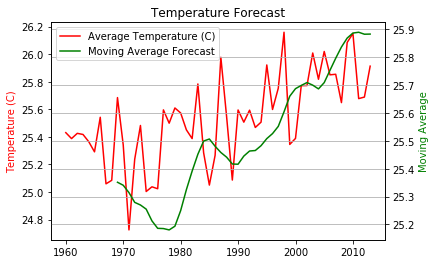

In [22]:
#A moving average can actually be quite effective, especially if you pick the right p for the series.
country = input ("Please type the country you would like to analyze: ").lower()


country_tmp = GroupedReset[GroupedReset['Country'] == country]

#Apply the rolling function for Moving Average:
y_hat_avg = country_tmp.copy()
y_hat_avg['moving_avg_forecast'] = country_tmp['AverageTemperature'].rolling(10, win_type='triang').mean()


fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

# Plot the CO2 Emissions
temp, = ax1.plot(country_tmp['year'], country_tmp['AverageTemperature'], label='Average Temperature (C)', color='red')

# Plot the CO2 Forecasting
forecast, = ax2.plot(y_hat_avg['year'], y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast', color='green')

plt.title("Temperature Forecast")
ax1.set_ylabel('Temperature (C)', color='red')
ax2.set_ylabel('Moving Average', color='green')
plt.grid(True)
plt.legend(handles=[temp, forecast], loc="best")

plt.show()

fig.savefig('../../Images/forecast_temperature_' + country + '.png')